In [ ]:
import numpy as np
import ot
import pandas as pd
from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plt
import TiOT_lib


In [17]:
import matplotlib.pyplot as plt
import numpy as np

def plot_alignment(x, y, transport_plan, 
                   color1='red', color2='blue', line_color='green',
                   title=None, figsize=(8, 6), alpha=0.8,
                   show=True, vertical_factor = 1.3, filename = 'alignment'):
    """
    Plot alignment between two sequences given a mapping with weights.
    Uses indices as x-coordinates.

    Parameters
    ----------
    x, y : array-like
        Two sequences to align.
    transport_plan : list of tuples
        List of (i, j, weight) specifying alignments.
    color1 : str, optional
        Color for first sequence.
    color2 : str, optional
        Color for second sequence.
    line_color : str, optional
        Color for alignment lines.
    title : str, optional
        Plot title.
    figsize : tuple, optional
        Figure size.
    alpha : float, optional
        Transparency of alignment lines.
    show : bool, optional
        Whether to display the plot immediately.

    Returns
    -------
    fig, ax : matplotlib Figure and Axes
    """
    y = y.copy() + vertical_factor* max(x)
    t1 = np.arange(len(x))
    t2 = np.arange(len(y))
    if len(t2) > len(t1):
        horizontal_factor = len(t2) / len(t1)
        t1 = horizontal_factor * t1
    elif len(t1)> len(t2):
        horizontal_factor = len(t1) / len(t2)
        t2 = horizontal_factor * t2
    sns.set(style="white", context="paper")
    fig, ax = plt.subplots(figsize=figsize)
    for spine in ax.spines.values():
        spine.set_edgecolor("lightgray")
    # Plot sequences
    ax.plot(t1, x,  color=color1, zorder=2)
    ax.plot(t2, y,  color=color2, zorder=2)

    # Draw alignments
    for i in range(len(transport_plan)):
        for j in range(len(transport_plan[0])):
            ax.plot([t1[i], t2[j]], [x[i], y[j]],
                color=line_color, lw=transport_plan[i][j] * len(t1), alpha=alpha, zorder=1)            
    # Style
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_frame_on(True)
    ax.set_title(title, fontsize=12)

    plt.tight_layout()
    plt.savefig(filename + '.pdf', dpi=300)
    if show:
        plt.show()
    plt.close()
    return fig, ax

def gaussians(n, peaks, heights, widths, noise = 0.01, seed = 0):
    rng = np.random.default_rng(seed)
    t = np.arange(n)
    y = np.zeros_like(t, dtype=float)
    for p, h, w in zip(peaks, heights, widths):
        y += h * np.exp(-(t - p) ** 2 / (2 * w ** 2))
    y += rng.normal(0, noise, size=n)
    return y




In [15]:
x = gaussians(n = 200, peaks=[80,170], heights=[0.2,1.2], widths=[6,8])
y = gaussians(n = 200, peaks=[45,135], heights=[0.3,1.0], widths=[5,7])
z = gaussians(n = 100, peaks=[20,70], heights= [0.3, 1.0], widths=[2,4])


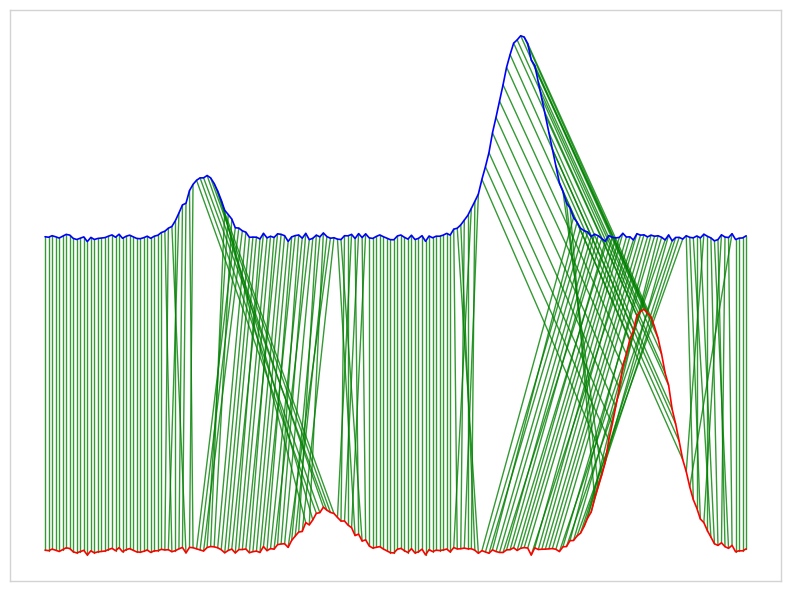

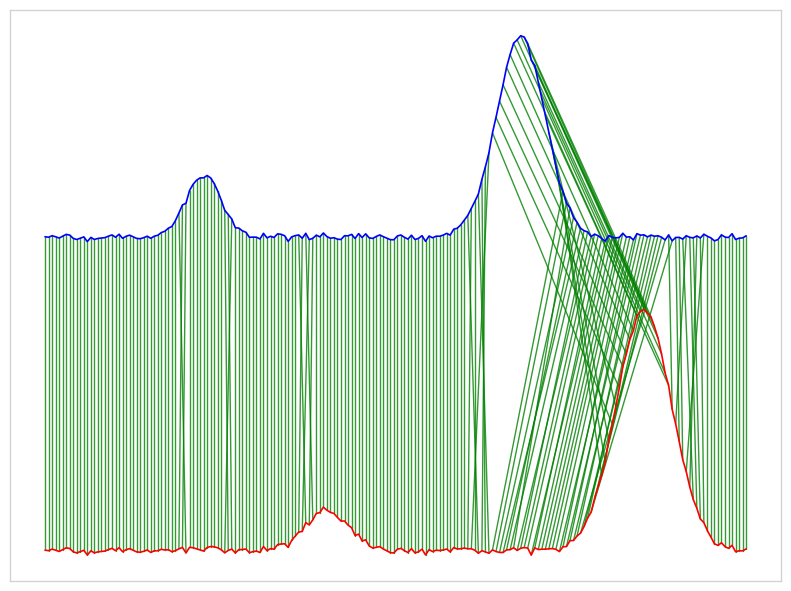

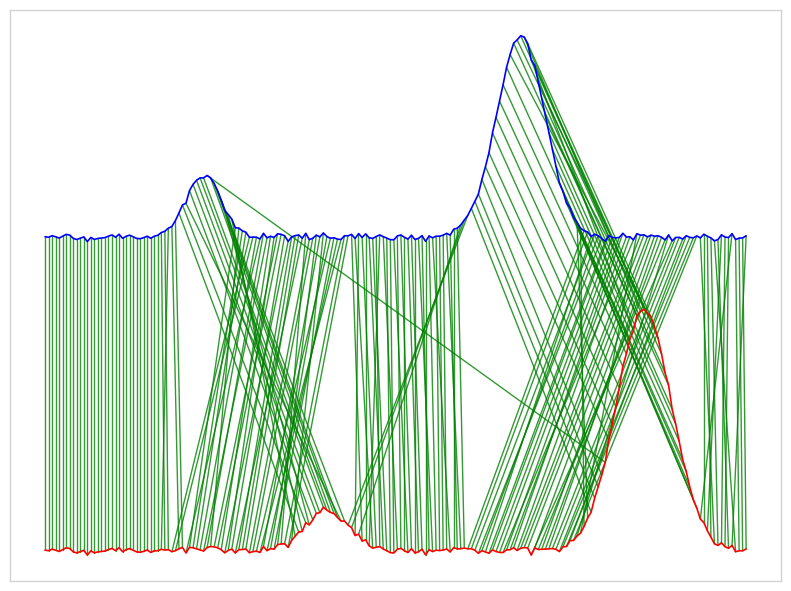

(<Figure size 800x600 with 1 Axes>, <Axes: >)

In [18]:
d, pi, w_opt = TiOT_lib.TiOT(x, y, detail_mode=True)
plot_alignment(x, y, pi, filename='Alignment1_wopt')

d, pi = TiOT_lib.TAOT(x, y, w =  0.1)
plot_alignment(x, y, pi, filename='Alignment1_w1')

d, pi = TiOT_lib.TAOT(x, y, w =  0.8)
plot_alignment(x,y,pi, filename='Alignment1_w2')

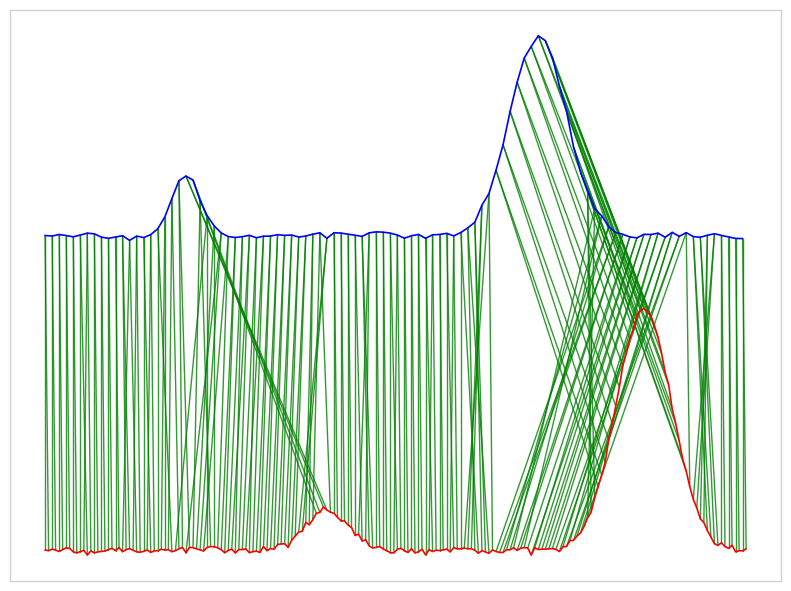

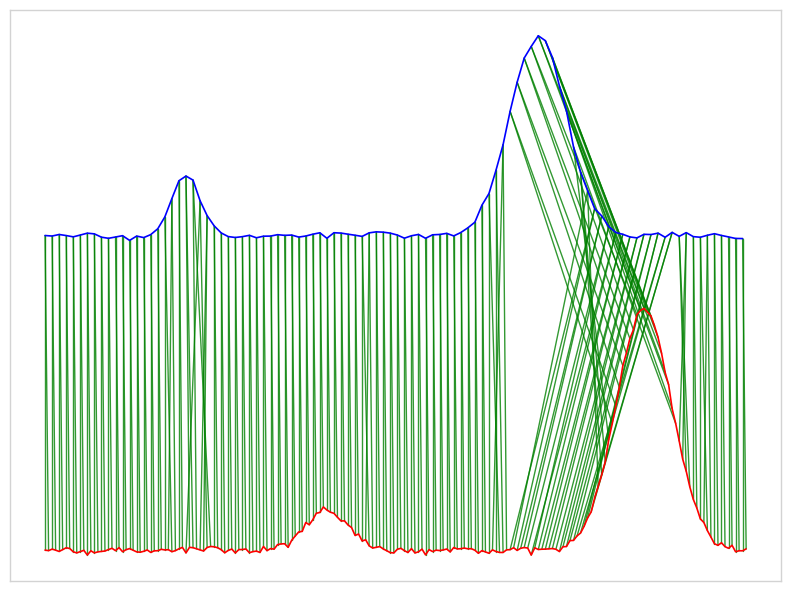

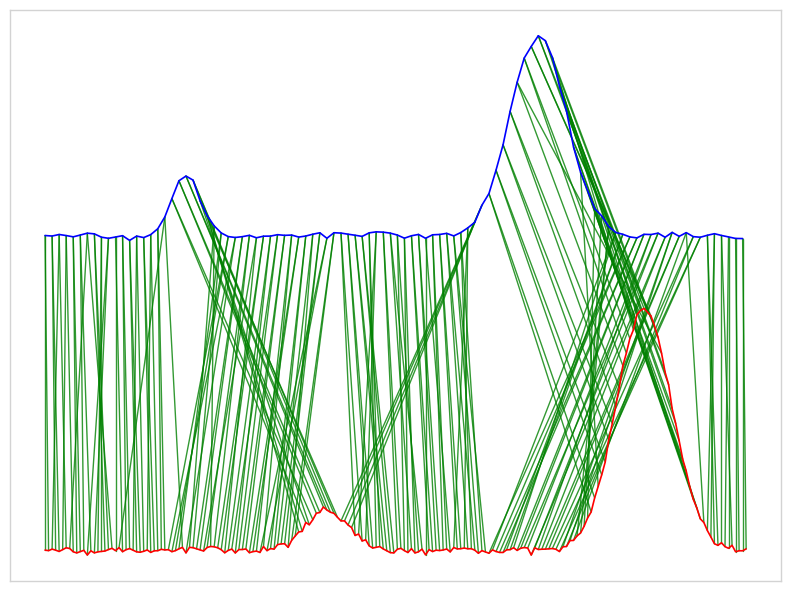

(<Figure size 800x600 with 1 Axes>, <Axes: >)

In [19]:
d, pi, w_opt = TiOT_lib.TiOT(x, z, detail_mode=True)
plot_alignment(x, z, pi, filename='Alignment2_wopt')

d, pi = TiOT_lib.TAOT(x, z, w =  0.1)
plot_alignment(x, z, pi, filename='Alignment2_w1')

d, pi = TiOT_lib.TAOT(x, z, w =  0.8)
plot_alignment(x,z,pi, filename='Alignment2_w2')